# Análisis de clustering de partición


In [116]:
#Cargamos librerias
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 

In [117]:
# Cargamos el data set 
csv = pd.read_csv('Data_asociation.csv')
#Eliminamos las columnas que no ocupamos
csv = csv.iloc[:,[2,8]]
csv = csv.sample(n=100)
csv.head()

,Group,EDUC
230,Nondemented,11
300,Demented,15
97,Demented,16
200,Nondemented,18
324,Nondemented,16


In [118]:
#Transformamos las variables Group y M/F a numericas
le = LabelEncoder()  
csv['Group']= le.fit_transform(csv['Group']) 
csv.head()

,Group,EDUC
230,2,11
300,1,15
97,1,16
200,2,18
324,2,16


In [119]:
dataset = pd.read_csv('train.csv')
x1 = csv.iloc[0:50,0]
x2 = csv.iloc[0:50,1]

In [120]:
x1 = preprocessing.scale(x1)
x2 = preprocessing.scale(x2)

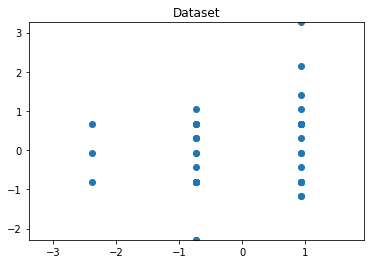

In [121]:
plt.plot()
plt.xlim([x1.min()-1,x1.max()+1])
plt.ylim([x2.min(), x2.max()])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

## Método del Codito :3

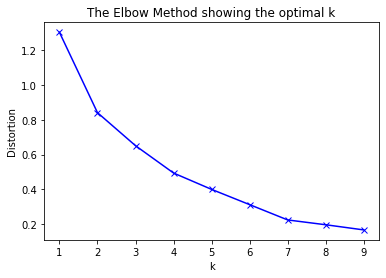

In [122]:
# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Método de Silhouette

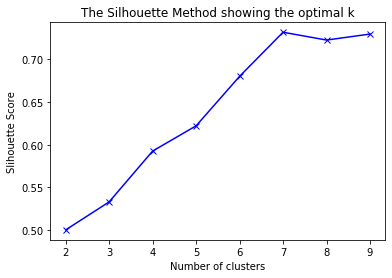

In [127]:
from sklearn.metrics import silhouette_score

#Cargamos le conjunto de datos
df = X
plt.plot()

#Use silhouette score
range_n_clusters = list (range(2,10))

#Arreglo de silhouette_score
Scores =[]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df)
    centers = clusterer.cluster_centers_
    Scores.append(silhouette_score(df, preds))   

# Plot the elbow
plt.plot(range_n_clusters, Scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Slihouette Score')
plt.title('The Silhouette Method showing the optimal k')
plt.show()